**CNN WHITE BLOOD CELLS CLASSIFICATION ALGORITHM**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
from os import listdir
import cv2
import glob
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


In [ ]:
data = []
folder_dir = "drive/My Drive/Raabin - WBC/crop_dataset/"
count = 0
for wbc in os.listdir(folder_dir):
    count=0
    for images in os.listdir(folder_dir+"/"+wbc):
        data.append([folder_dir+"/"+wbc+"/"+images,wbc])
data1 = pd.DataFrame(data,columns=['images','Category'])
data1.head()

,images,Category
0,drive/My Drive/Raabin - WBC/crop_dataset//lymp...,lymphocyte
1,drive/My Drive/Raabin - WBC/crop_dataset//lymp...,lymphocyte
2,drive/My Drive/Raabin - WBC/crop_dataset//lymp...,lymphocyte
3,drive/My Drive/Raabin - WBC/crop_dataset//lymp...,lymphocyte
4,drive/My Drive/Raabin - WBC/crop_dataset//lymp...,lymphocyte


In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [ ]:
data = []
lables = []
c = 0 ## to see the progress
for image in pbar(data1['images']):

    lables.append(data1['Category'][c])

    img = cv2.imread(image)
    data.append(img)
    c=c+1

100% (5530 of 5530) |####################| Elapsed Time: 0:49:29 Time:  0:49:29


In [ ]:
data = np.load("drive/My Drive/Raabin - WBC/data.npy")
lables = np.load("drive/My Drive/Raabin - WBC/lable.npy")

In [ ]:
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)
lables_df = pd.DataFrame(np.unique(lables))
le = LabelEncoder()
lables = le.fit_transform(lables)
lb = LabelBinarizer()
one_hot = lb.fit_transform(lables)

In [ ]:
(trainX, testX, trainY, testY ) = train_test_split(data, one_hot, test_size= 0.25,random_state=42)
trainX = trainX/255
testX = testX/255

In [6]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00


In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Load the EfficientNetB0 model with pre-trained weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(80, 80, 3))


# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top of the EfficientNetB0 base
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Assuming 4 output classes, adjust based on your task
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


16804768/16804768 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 3, 3, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                         

In [ ]:
hist = model.fit(trainX, trainY, epochs=10,validation_data=(testX,testY))


Epoch 1/10
130/130 [==============================] - 9s 28ms/step - loss: 0.4351 - accuracy: 0.8375 - val_loss: 0.1943 - val_accuracy: 0.9364
Epoch 2/10
130/130 [==============================] - 2s 17ms/step - loss: 0.2147 - accuracy: 0.9199 - val_loss: 0.1623 - val_accuracy: 0.9458
Epoch 3/10
130/130 [==============================] - 2s 17ms/step - loss: 0.1924 - accuracy: 0.9322 - val_loss: 0.1314 - val_accuracy: 0.9516
Epoch 4/10
130/130 [==============================] - 2s 16ms/step - loss: 0.1570 - accuracy: 0.9457 - val_loss: 0.1250 - val_accuracy: 0.9566
Epoch 5/10
130/130 [==============================] - 2s 16ms/step - loss: 0.1472 - accuracy: 0.9486 - val_loss: 0.1338 - val_accuracy: 0.9559
Epoch 6/10
130/130 [==============================] - 2s 16ms/step - loss: 0.1257 - accuracy: 0.9566 - val_loss: 0.1050 - val_accuracy: 0.9653
Epoch 7/10
130/130 [==============================] - 2s 15ms/step - loss: 0.1285 - accuracy: 0.9542 - val_loss: 0.1015 - val_accuracy: 0.9646

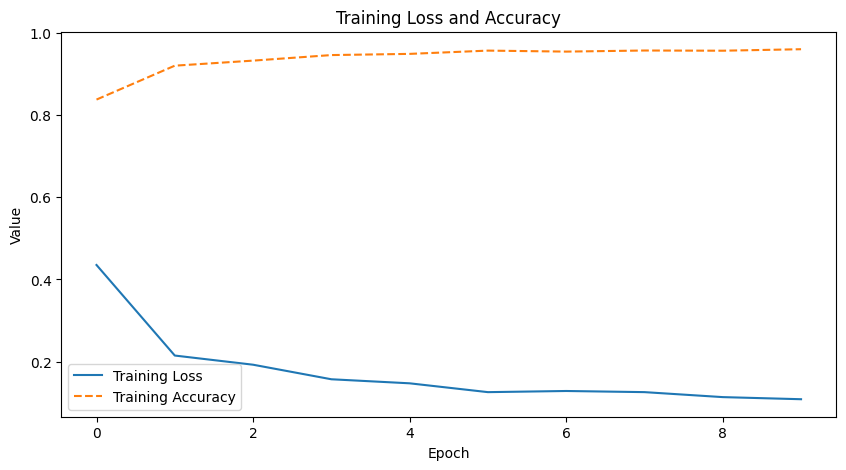

In [ ]:
# Plotting Loss and Accuracy in a single graph
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Plotting Accuracy on the same graph
plt.plot(hist.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Display legend
plt.legend()

# Display the plot
plt.show()

In [8]:
!pip install visualkeras

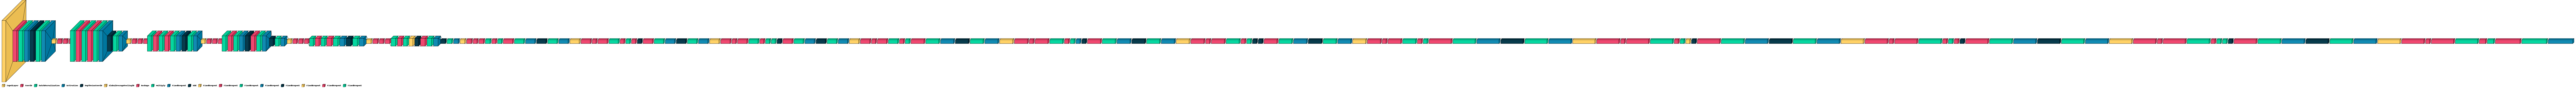

In [9]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(base_model, legend=True)

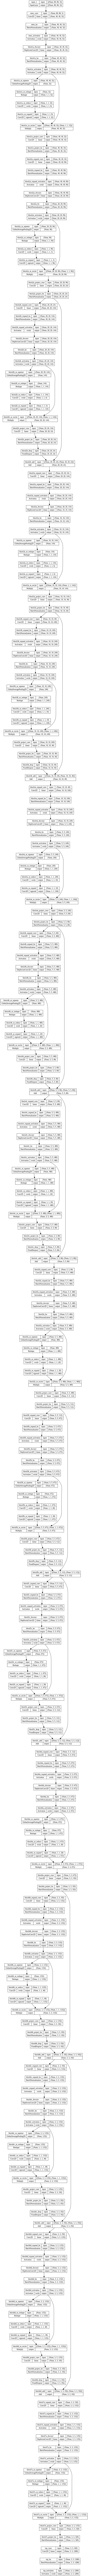

In [10]:
tf.keras.utils.plot_model(
base_model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes
print("Classification Report: \n", classification_report([np.argmax(element) for element in testY], y_pred_classes))

44/44 [==============================] - 0s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       353
           1       0.93      0.99      0.96       323
           2       0.97      0.90      0.94       336
           3       0.98      0.99      0.98       371

    accuracy                           0.96      1383
   macro avg       0.96      0.96      0.96      1383
weighted avg       0.96      0.96      0.96      1383



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(trainX)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes
print("Classification Report: \n", classification_report([np.argmax(element) for element in trainY], y_pred_classes))

130/130 [==============================] - 2s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1142
           1       0.96      0.99      0.98       855
           2       0.98      0.95      0.97      1022
           3       0.99      1.00      1.00      1128

    accuracy                           0.98      4147
   macro avg       0.98      0.98      0.98      4147
weighted avg       0.98      0.98      0.98      4147



44/44 [==============================] - 1s 11ms/step
Accuracy: 0.96


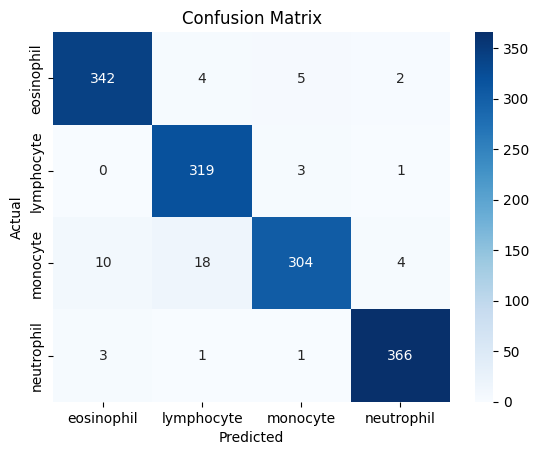

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
y_pred = model.predict(testX)
# Evaluate accuracy
y_pred = le.inverse_transform([np.argmax(element) for element in y_pred])

accuracy = accuracy_score(le.inverse_transform([np.argmax(element) for element in testY]), y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Create confusion matrix
conf_mat = confusion_matrix(le.inverse_transform([np.argmax(element) for element in testY]),y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(lables_df[0]), yticklabels=np.unique(lables_df[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()